<a href="https://colab.research.google.com/github/gmanojkumar402-max/Manoj-colab-notebooks/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + X + 2 + np.random.randn(200,1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

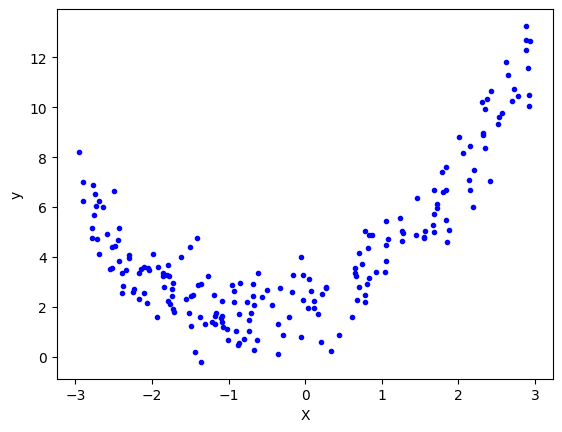

In [ ]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.2529655217577136

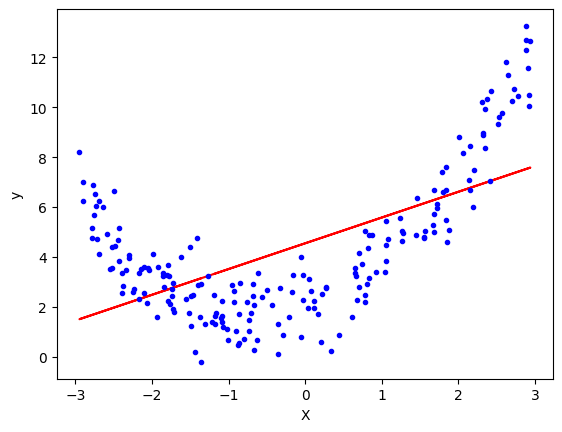

In [ ]:
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
p = PolynomialFeatures(degree = 2, include_bias = True)
X_train_trans = p.fit_transform(X_train)
X_test_trans = p.transform(X_test)

In real-time datasets we will not be aware if there is a bias term or not so we have to use include bias terms = true and false both and see if it is there or not



Polynoimial fetures is only applied on input and not on output
Transformation is applied on both x_train and X_test

In [ ]:
print(X_train[0])

[-1.18871112]


In [ ]:
print(X_train_trans[0])

[ 1.         -1.18871112  1.41303412]


In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_trans)

In [ ]:
r2_score(y_test,y_pred)

0.8952143028068282

In [ ]:
lr.coef_

array([[0.        , 1.00837182, 0.82699955]])

In [ ]:
lr.intercept_

array([1.99979135])

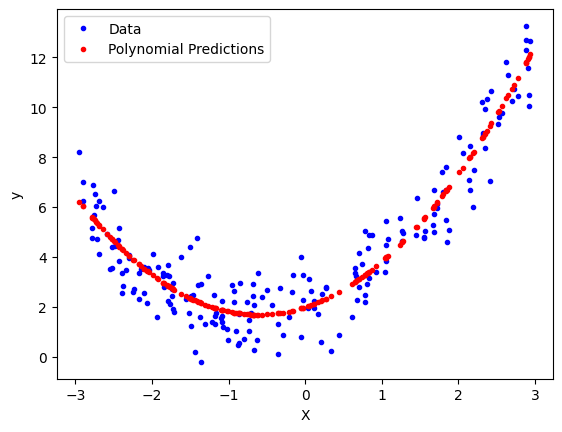

In [ ]:
# on actual data
X_trans = p.transform(X)
y_pred_poly = lr.predict(X_trans)
plt.plot(X, y, 'b.', label='Data')
plt.plot(X, y_pred_poly, 'r.', label='Polynomial Predictions')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = p.transform(X_new)
y_new = lr.predict(X_new_poly)

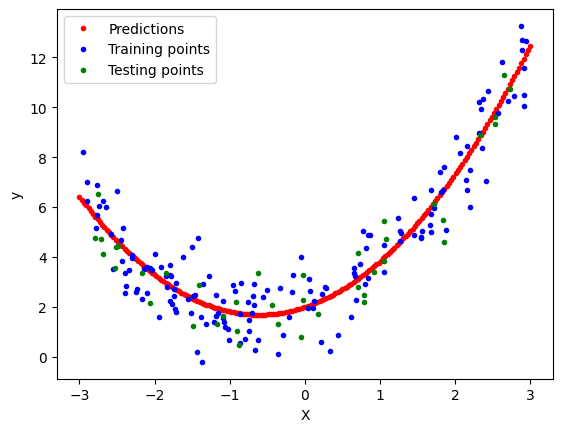

In [ ]:
plt.plot(X_new,y_new, 'r.', linewidth = 2, label = 'Predictions')
plt.plot(X_train, y_train,'b.', label = 'Training points')
plt.plot(X_test,y_test, 'g.', label = 'Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = p.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

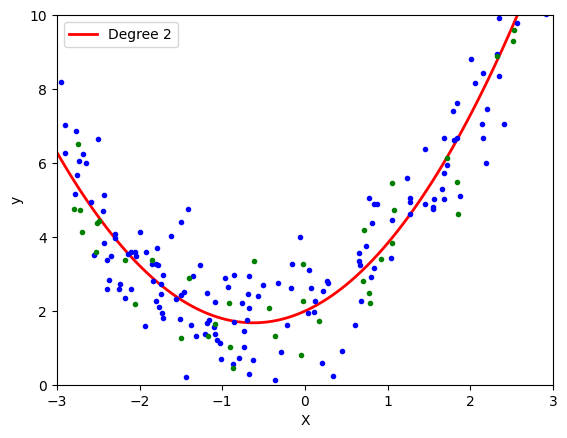

In [ ]:
polynomial_regression(2)

The above plot plotting works only for 1-D feature input, because you can only draw a curve in 2D.

Solution: learning curves + R² scores together give the most reliable way to choose the optimal polynomial degree.

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(degree):
    # Build pipeline for polynomial regression
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X, y.ravel(),              # y must be 1D for learning_curve
        cv=5,
        scoring="r2",
        train_sizes=np.linspace(0.1, 1.0, 10),
        shuffle=True,
        random_state=42
    )

    # Mean R² scores
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, "o-", label="Training R²")
    plt.plot(train_sizes, test_mean, "o-", label="Validation R²")
    plt.title(f"Learning Curve (Polynomial Degree = {degree})")
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Final Train R²: {train_mean[-1]:.4f}")
    print(f"Final Test R²:  {test_mean[-1]:.4f}")


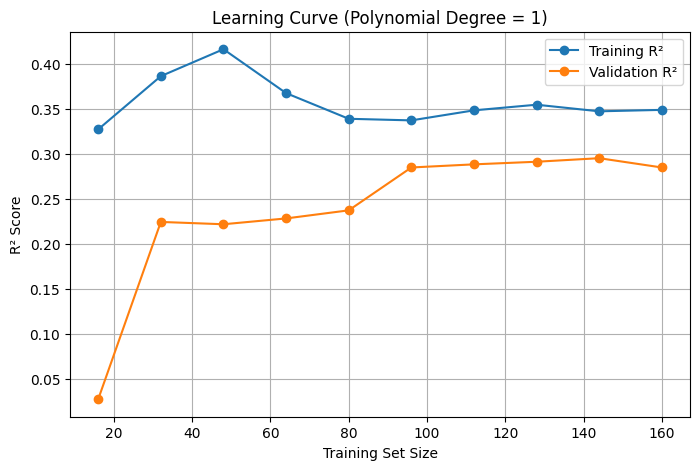

Final Train R²: 0.3493
Final Test R²:  0.2852


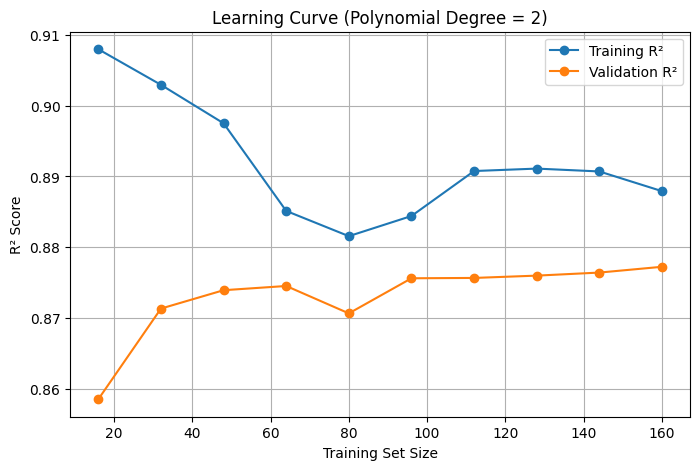

Final Train R²: 0.8879
Final Test R²:  0.8772


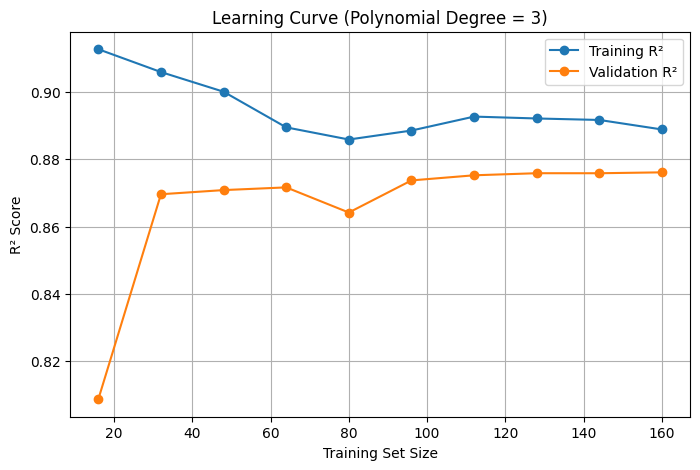

Final Train R²: 0.8888
Final Test R²:  0.8761


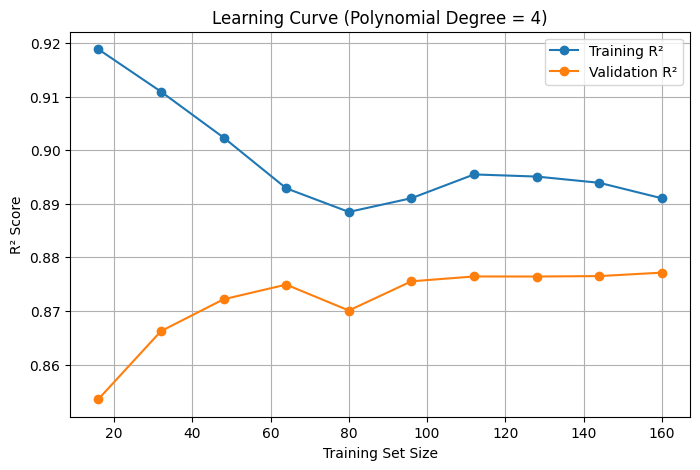

Final Train R²: 0.8910
Final Test R²:  0.8771


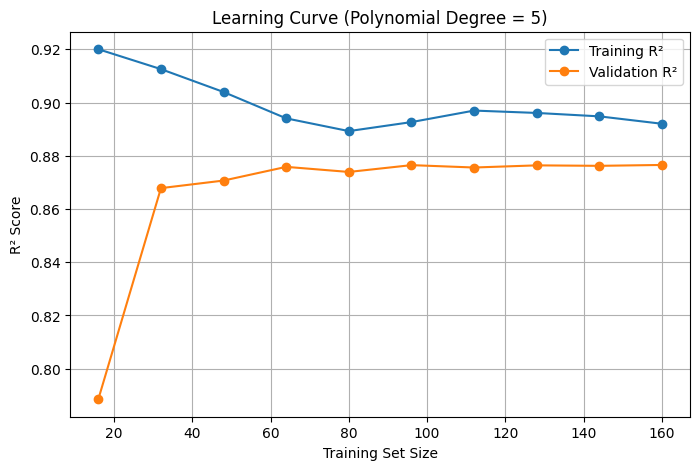

Final Train R²: 0.8920
Final Test R²:  0.8766


In [ ]:
for d in [1, 2, 3, 4, 5]:
    plot_learning_curve(d)

In [ ]:
#3D polynomial regression
x = 7 * np.random.rand(100,1) - 2.8 # 1st input column
y = 7 * np.random.rand(100,1) -2.8 # 2nd input column
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.rand(100,1)#target

In [ ]:
import plotly.express as px
import pandas as pd

# Convert arrays to a DataFrame
df = pd.DataFrame({'x': x.ravel(), 'y': y.ravel(), 'z': z.ravel()})

# 3D scatter plot
fig = px.scatter_3d(df, x='x', y='y', z='z', color='z')
fig.show()


In [ ]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [ ]:
X_multi_trans.shape

(100, 6)

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [ ]:
X_test_multi = poly.transform(final)

In [ ]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

def plot_learning_curve_3D(X, y, degree):
    # Pipeline: Polynomial expansion → Linear regression
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])

    # Compute learning curves using 5-fold CV
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y.ravel(),         # y must be 1D
        cv=5,
        scoring="r2",
        shuffle=True,
        train_sizes=np.linspace(0.1, 1.0, 8),
        random_state=42
    )

    # Mean R² scores
    train_mean = train_scores.mean(axis=1)
    test_mean  = test_scores.mean(axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, "o-", label="Training R²")
    plt.plot(train_sizes, test_mean, "o-", label="Validation R²")

    plt.title(f"Learning Curve (Polynomial Degree = {degree})")
    plt.xlabel("Training Set Size")
    plt.ylabel("R² Score")
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Final Train R²: {train_mean[-1]:.4f}")
    print(f"Final Test R²:  {test_mean[-1]:.4f}")


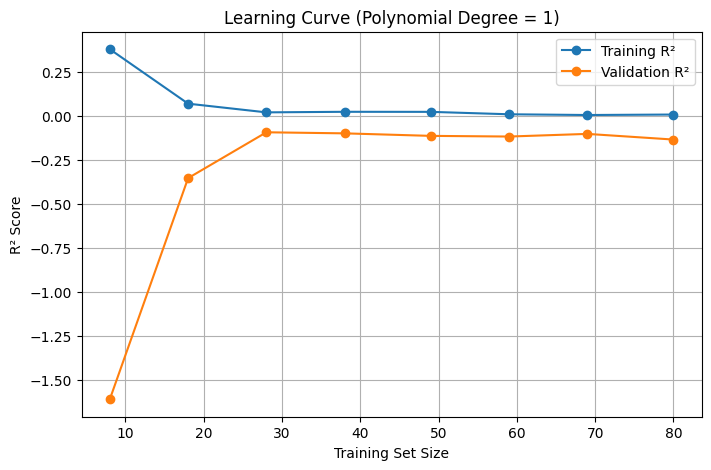

Final Train R²: 0.0085
Final Test R²:  -0.1339


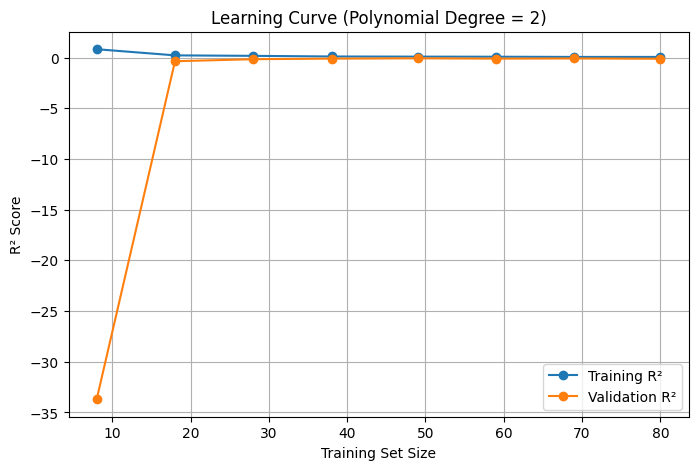

Final Train R²: 0.0584
Final Test R²:  -0.1214


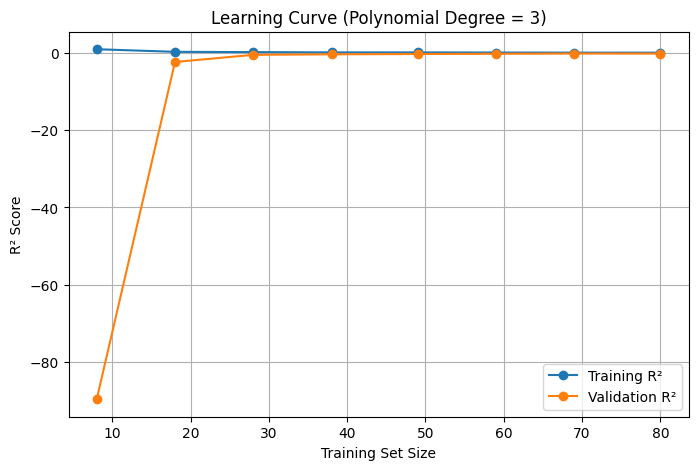

Final Train R²: 0.1031
Final Test R²:  -0.1354


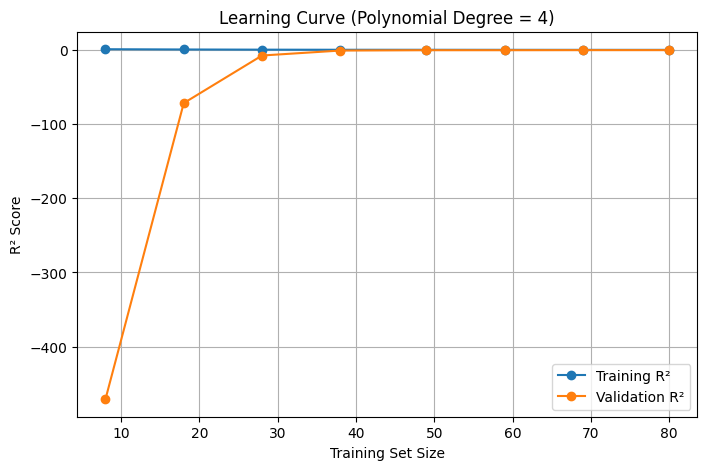

Final Train R²: 0.1463
Final Test R²:  -0.2147


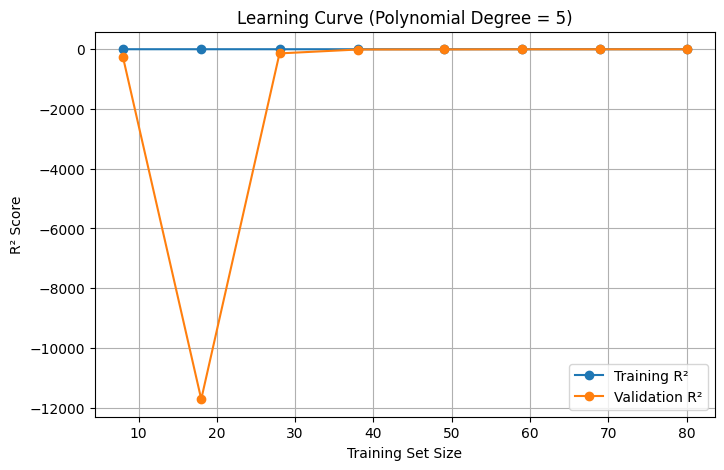

Final Train R²: 0.1756
Final Test R²:  -1.0855


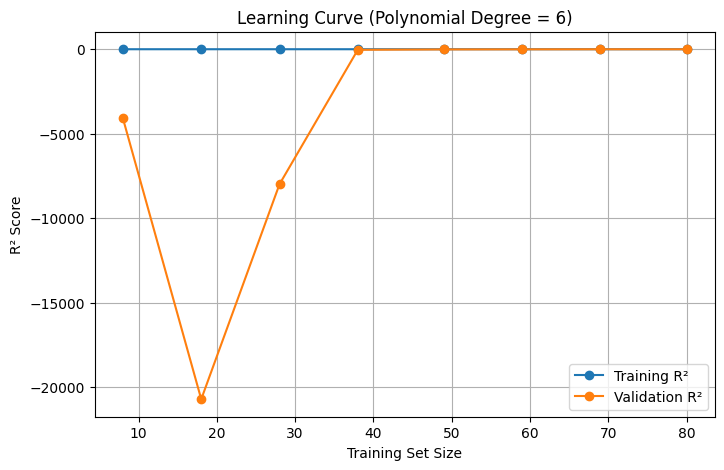

Final Train R²: 0.3137
Final Test R²:  -2.3745


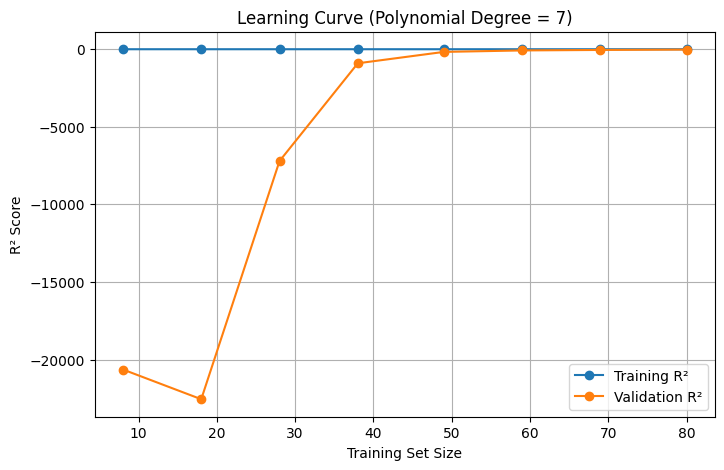

Final Train R²: 0.4007
Final Test R²:  -22.7121


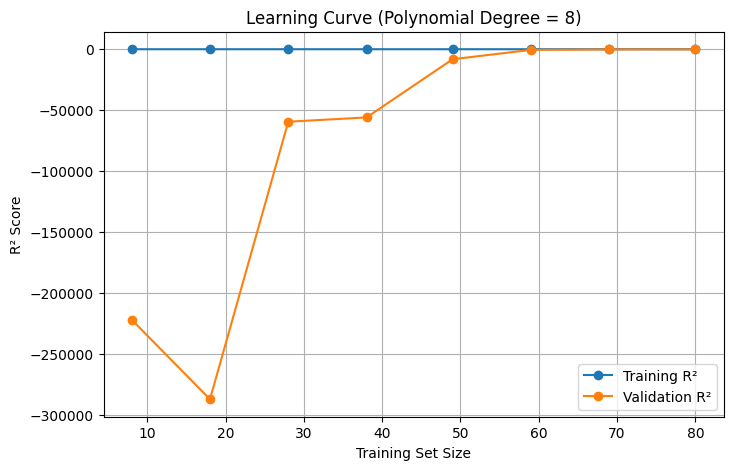

Final Train R²: 0.5445
Final Test R²:  -153.3369


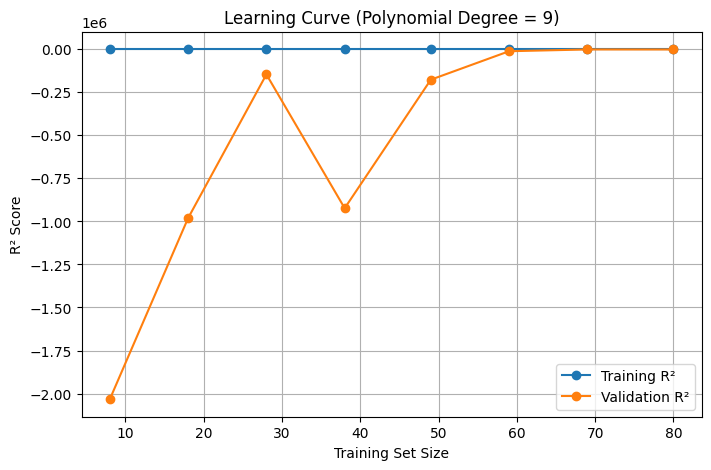

Final Train R²: 0.6879
Final Test R²:  -1565.8757


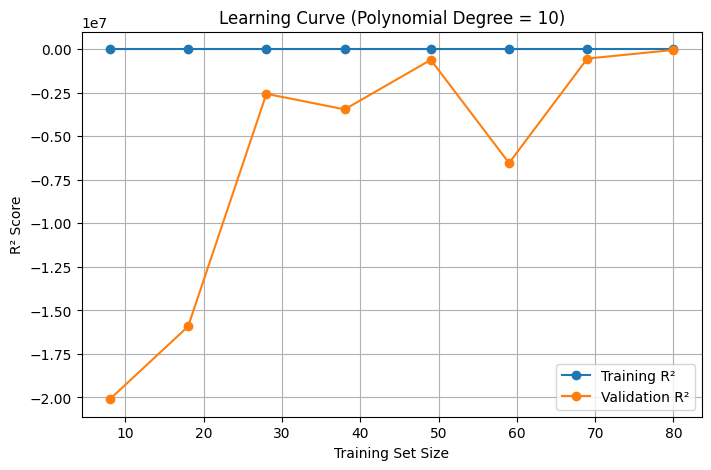

Final Train R²: 0.8633
Final Test R²:  -42832.8804


In [ ]:

X_multi = np.array([x, y]).reshape(100, 2)
for d in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    plot_learning_curve_3D(X_multi, z, degree=d)
